In [767]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rand(r, c):
    x = np.random.rand(r, c)
    return(x)

In [768]:
rand(4,3)

array([[ 0.51722896,  0.12613559,  0.99850676],
       [ 0.37653729,  0.55306947,  0.48535261],
       [ 0.3315381 ,  0.39340688,  0.964728  ],
       [ 0.15399253,  0.59099001,  0.08424163]])

In [769]:
def sequ(r, c):
    x = r*c
    y = np.arange(0, x, dtype=np.float)
    return (y)

In [770]:
sequ(4,3)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.])

In [793]:
def n_size(n):
    x = np.linspace(0, 1, n).reshape(1, n)
    if ((1, n) != x.shape):
        return (0)
    return (x)

In [794]:
inc(4)

array([[ 0.        ,  0.33333333,  0.66666667,  1.        ]])

In [795]:
def extract(n):
    x = np.arange(0, 120, dtype=np.float).reshape(10, 12)
    x = x[0:5, 7:12]
    return (x)

In [796]:
extract(120)

array([[  7.,   8.,   9.,  10.,  11.],
       [ 19.,  20.,  21.,  22.,  23.],
       [ 31.,  32.,  33.,  34.,  35.],
       [ 43.,  44.,  45.,  46.,  47.],
       [ 55.,  56.,  57.,  58.,  59.]])

In [797]:
def matplot(m, n):
    tmp = n_size(m)
    color = tmp *  n
    print(color)
    return(plt.imshow(color, aspect=n))

[[  0.           1.11111111   2.22222222   3.33333333   4.44444444
    5.55555556   6.66666667   7.77777778   8.88888889  10.        ]]


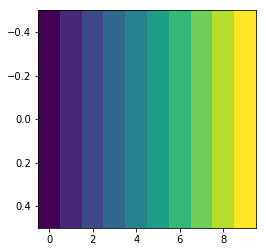

In [798]:
matplot(10, 10)

In [799]:
def img(m, n):
    x = plt.imread('lt.png')
    a = x.shape[0]
    b = x.shape[1]
    c = x.shape[2]
    for i in range (0, 4):
       x = x[:,:,i] * matplot(m, n)
    plt.imshow(x)

[[  0.00000000e+00   1.00010001e-01   2.00020002e-01 ...,   9.99799980e+02
    9.99899990e+02   1.00000000e+03]]


TypeError: unsupported operand type(s) for *: 'float' and 'AxesImage'

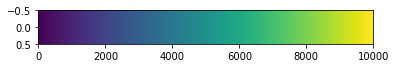

In [800]:
img(10000, 1000)